### Meilenstein 3 - Centrality

In [1]:
import src.networkCentrality.myCentrality as MyCentr
import test_.HelperClass as Hc
from src.printGraph import draw_graph as draw_graph
from src.Graph import Graph

### Unsere eigene Zentralität

Vielleicht aber nicht das kreativste :D. Allerdings habe ich das Ganze geschrieben, bevor wir die Closeness Centrality in der Vorlesung behandelt haben.

Alle Zentralitäten werden initialisiert oder auf 1 gesetzt, falls nicht initialisert werden soll.

Die Zentralität eines Knotens v berechnet sich nun folgendermaßen:

$\sum_{\text{w Knoten in G, } w\neq v} c(w)\cdot \frac{1}{dist(w, v)^p}$

p kann durch den Nutzer gesetzt werden, ist aber normalerweise einfach 2

Die Laufzeit ist demnach n-mal Breitensuche (Für die Berechnung der Distanzen), also $O(n\cdot m)$. Anschließend muss nochmal in allNodesCentrality über alle Knoten iteriert werden, also $O(n^2)$. 

Die Laufzeit kann analog zur Vorlesung verbessert werden, indem gleichverteilt k Knoten ausgewählt werden und die Breitensuche nur für diese Knoten gemacht wird. Damit haben wir einen Aufwand von:

$O(k\cdot (n + m) + n\cdot k) = O(k\cdot (n + m))$

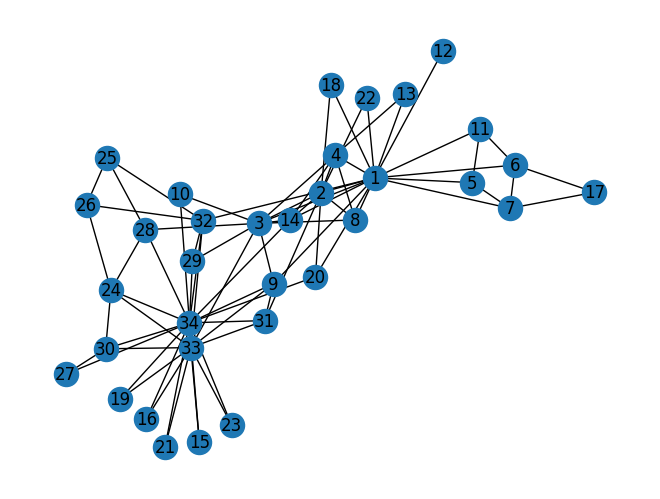

In [2]:
G = Graph("networks/out.ucidata-zachary_", mode=Graph.READ_MOD_EDGE_LIST)
draw_graph(G, label_on=True)

In [3]:
# all nodes centrality as a dictionary
print(MyCentr.ownCentrality(G))

# single node centrality
print(MyCentr.ownCentrality(G, node="3"))

# most central node (nodes if some nodes have the same value)
print(MyCentr.ownCentrality(G, k=1))

# k-most central nodes
print(MyCentr.ownCentrality(G, k=3))

{'1': 19.138888888888886, '2': 13.472222222222218, '3': 15.333333333333332, '4': 11.222222222222218, '5': 7.888888888888886, '6': 8.638888888888886, '7': 8.638888888888886, '8': 9.534722222222218, '9': 11.583333333333332, '10': 8.173611111111107, '11': 7.888888888888886, '12': 6.2499999999999964, '13': 6.9999999999999964, '14': 11.583333333333332, '17': 4.903333333333334, '18': 7.138888888888886, '20': 10.083333333333332, '22': 7.138888888888886, '24': 9.734444444444442, '26': 7.1180555555555465, '25': 7.1180555555555465, '28': 9.951388888888886, '29': 9.201388888888886, '30': 8.845555555555553, '27': 7.019166666666664, '31': 9.951388888888886, '32': 12.61111111111111, '33': 15.951388888888886, '15': 7.206666666666664, '16': 7.206666666666664, '19': 7.206666666666664, '21': 7.206666666666664, '23': 7.206666666666664, '34': 19.562499999999996}
15.333333333333332
(['34'], [19.562499999999996])
(['33', '1', '34'], [15.951388888888886, 19.138888888888886, 19.562499999999996])


In [7]:
# Nun haben wir verschiedene Optionen:
# Wir können die Zentralitäten initialisieren, bspw mit der Grad Zentralität
initial_cent = dict()
for node in G.node_ids_internal_ids:
    initial_cent[node] = G.get_node_degree(node)

print(MyCentr.ownCentrality(G, init=initial_cent, k=3))

(['9', '1', '3'], [80.88888888888889, 83.83333333333337, 85.02777777777779])


In [11]:
# Statt eine Breitensuche über alle Knoten zu machen, können wir k Knoten 
# gleichverteilt auswählen
print(MyCentr.ownCentrality(G, k_uniform_nodes=20, k=3))

(['31', '33', '1'], [9.951388888888886, 15.951388888888886, 19.138888888888886])


In [12]:
# außerdem kann die Distanz anders skaliert werden durch Nutzen von p
print(MyCentr.ownCentrality(G, k=3, p=5))

(['33', '1', '34'], [12.408898373199591, 16.314171810699577, 17.225513599537024])
